In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [3]:
def standard_scaler(series):
    mu = np.mean(series)
    std = np.std(series)
    normalized = (series - mu) / std
    return normalized

# Example 1: Simple Linear Regression

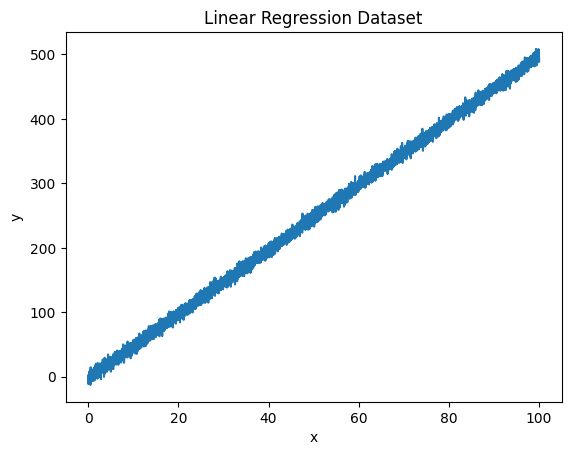

In [4]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [9]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=1500, print_cost=True, keep_prob=1)

Your backward propagation works perfectly fine! difference = 1.7674533427828741e-07
Cost after iteration 0: 41211.88988188687
Your backward propagation works perfectly fine! difference = 9.417022915222556e-10
Your backward propagation works perfectly fine! difference = 1.4046360233569879e-09
Cost after iteration 1000: 16.709071422937384
Cost after iteration 1499: 14.71067281869699


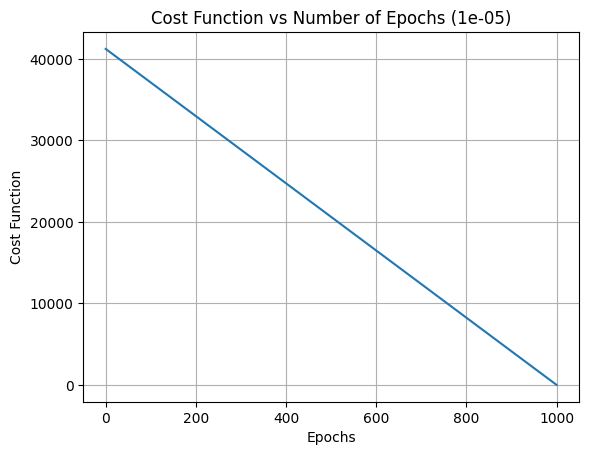

In [10]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True, debug=500)

In [11]:
pred_train = model.predict(train_x, train_y)

RMSE: 14.708081279906553


In [12]:
pred = model.predict(test_x, test_y)

RMSE: 15.836104517294803


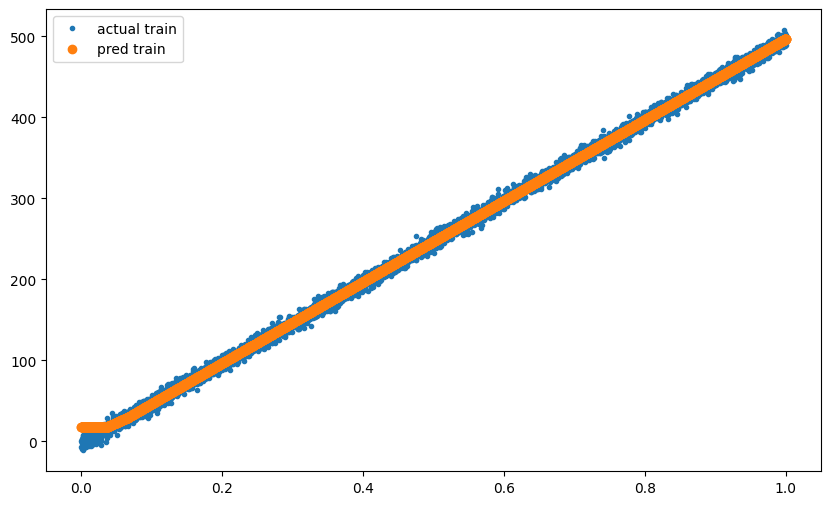

In [13]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

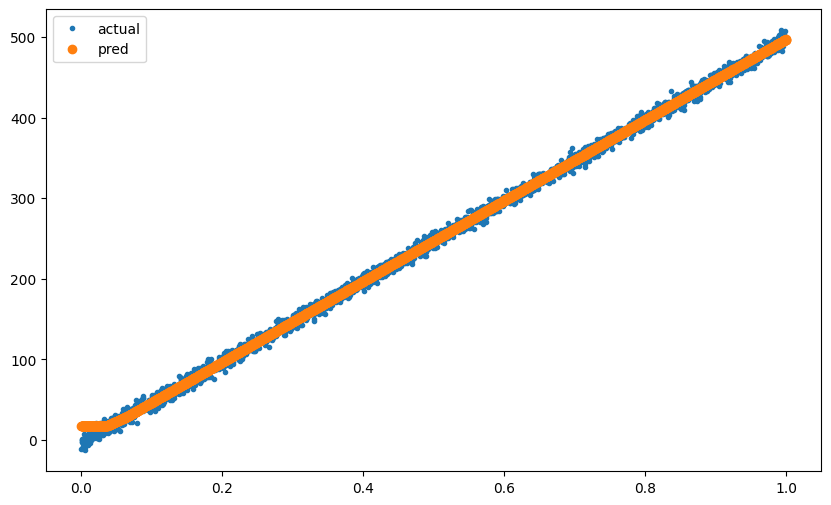

In [14]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

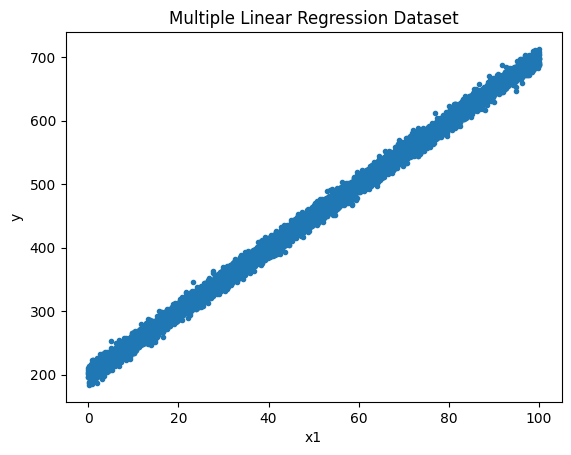

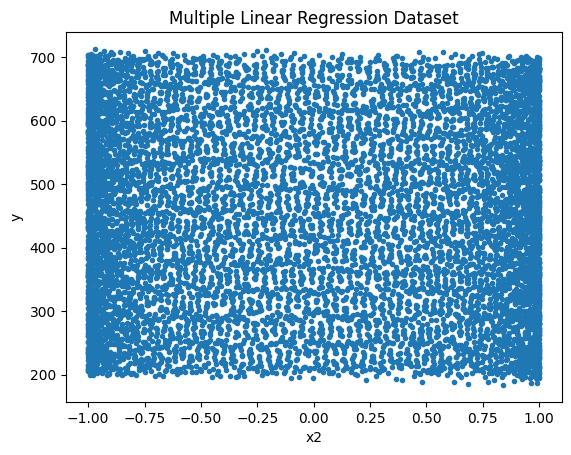

In [25]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [98]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [99]:
for col in train_x.columns:
    train_x[col] = standard_scaler(train_x[col])
    test_x[col] = standard_scaler(test_x[col])

# 3. Prediction

In [138]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],2, 1], task='regression', learning_rate=5e-6, n_epochs=5000, print_cost=True, lambd=None)

Cost after iteration 0: 12615196938.971085
Cost after iteration 500: 11843277332.297863
Cost after iteration 1000: 7921549878.796365
Cost after iteration 1500: 644171439.395228
Cost after iteration 2000: 1170932.5476941234
Cost after iteration 2500: 5141.089565424691
Cost after iteration 3000: 807.1974944725908
Cost after iteration 3500: 617.865868896556
Cost after iteration 4000: 601.1681309907527
Cost after iteration 4500: 599.5635117235956
Cost after iteration 4999: 599.4079716707324


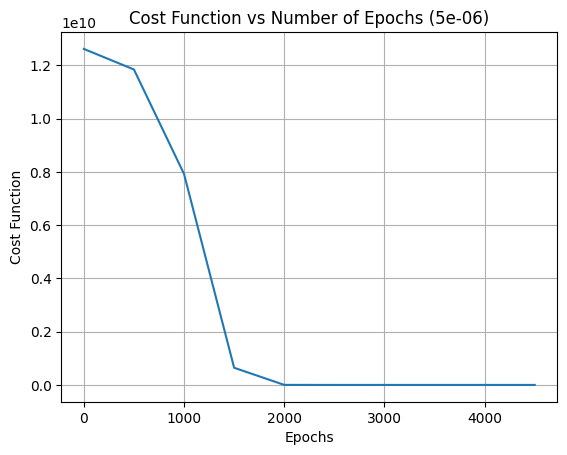

In [139]:
parameters, costs = model.fit(train_x, train_y, print_every=500, plot_cost_function=True)

In [140]:
pred_train = model.predict(train_x, train_y)

RMSE: 599.4078934277966


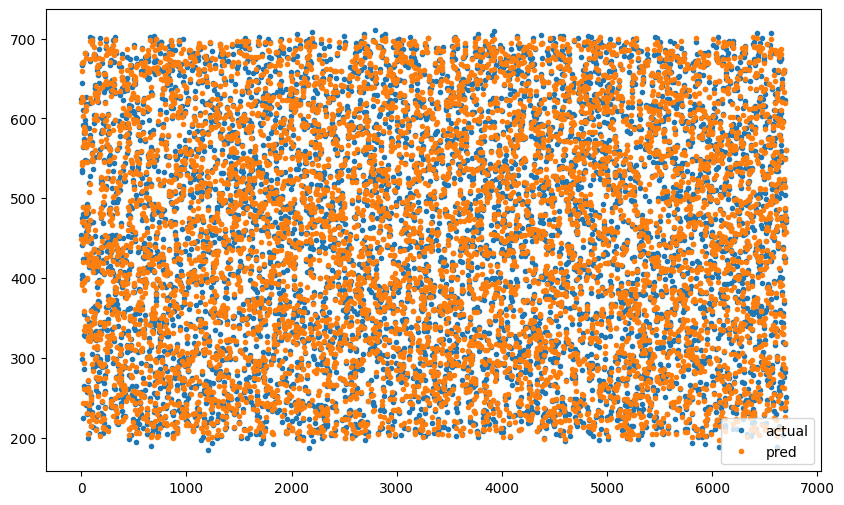

In [141]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(train_y),len(train_y)), train_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred_train.T),len(pred_train.T)), pred_train.T, '.', label='pred')
plt.legend();

In [142]:
pred = model.predict(test_x, test_y)

RMSE: 1040.4238043063199


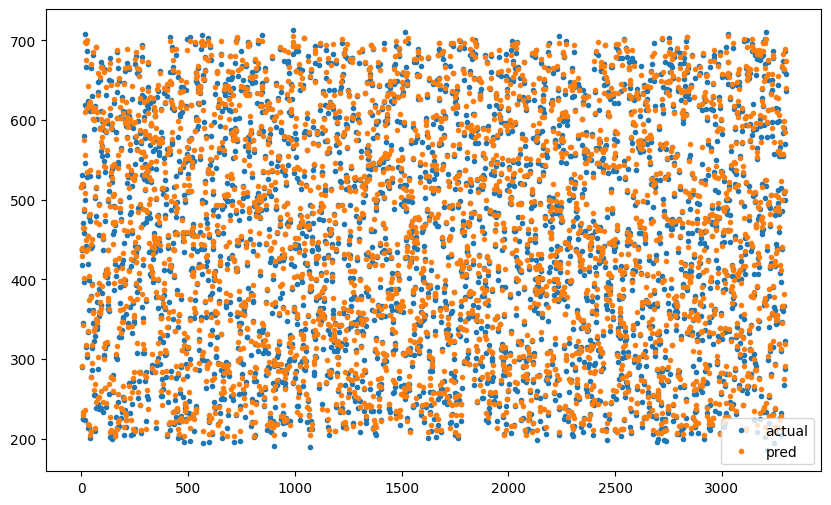

In [143]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,len(test_y),len(test_y)), test_y, '.', label='actual')
plt.plot(np.linspace(0,len(pred.T),len(pred.T)), pred.T, '.', label='pred')
plt.legend();

# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [10]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [11]:
for col in features.columns:
    features[col] = standard_scaler(features[col])

In [12]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [14]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1],4,2, 1], task='regression', learning_rate=1e-1, n_epochs=10000, print_cost=True, lambd=0)

There is a mistake in the backward propagation! difference = 0.7655868955298554
Cost after iteration 0: 13.836336136102673
There is a mistake in the backward propagation! difference = 0.03832240678418536
There is a mistake in the backward propagation! difference = 0.2596446920139723
There is a mistake in the backward propagation! difference = 0.3093380214514959
There is a mistake in the backward propagation! difference = 0.32890774210181917
There is a mistake in the backward propagation! difference = 0.3391616525842307
There is a mistake in the backward propagation! difference = 0.3455845317746618
There is a mistake in the backward propagation! difference = 0.35002532005185244
There is a mistake in the backward propagation! difference = 0.3539713501655725
There is a mistake in the backward propagation! difference = 0.3583752480946167
There is a mistake in the backward propagation! difference = 0.36423978393996026
Cost after iteration 1000: 0.0542936119693109
There is a mistake in the b

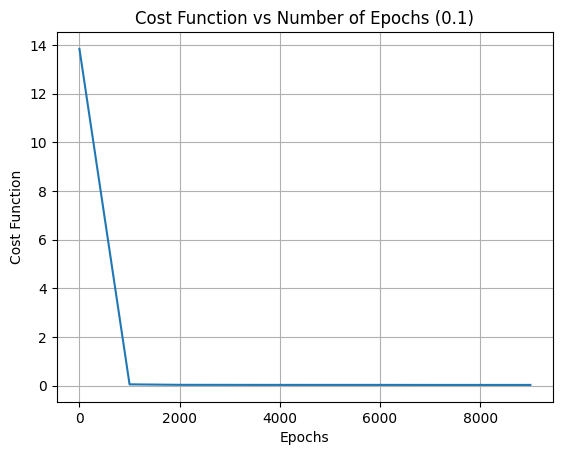

In [16]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True, debug=100)

In [212]:
pred_train = model.predict(train_x, train_y)
mean_absolute_percentage_error(train_y, pred_train.T)

RMSE: 0.03092238037642019


0.24048258980650575

In [213]:
pred = model.predict(test_x, test_y)
mean_absolute_percentage_error(test_y, pred.T)

RMSE: 0.03333645989335187


0.24819526292553476